# This is a file demonstrating the running of autoDEER code

## Setup

In [1]:
import os,sys;
import XeprAPI
import deerlab as dl
import matplotlib.pyplot as plt
import numpy as np
import time
# sys.path.append('/home/xuser/Desktop/huka/autoDeer/autoDeer')
from autoDeer.hardware import xepr_api as api
from autoDeer import Tunning as tune
import autoDeer.Param_Optimization as po
import autoDeer.DEER_4p as DEER


In [2]:
xepr=api() # This can only be run once per kernel
xepr.find_Xepr()
xepr.find_cur_exp()
xepr.find_hidden()

## Delay Optimisation

In [3]:
tune.tune(xepr,500,'main','R-')--> 270         x = x[0]

temp directory already exists
Phase Aim = 0.000
Phase Setting = 1564.2 	 Phase = -0.25 	 Phase Dif = 0.25
Phase Setting = 2530.8 	 Phase = -3.11 	 Phase Dif = 3.11
Phase Setting = 966.7 	 Phase = 1.19 	 Phase Dif = 1.19
Phase Setting = 1536.4 	 Phase = -0.18 	 Phase Dif = 0.18
Phase Setting = 1372.7 	 Phase = 0.15 	 Phase Dif = 0.15
Phase Setting = 1217.6 	 Phase = 0.45 	 Phase Dif = 0.45
Phase Setting = 1448.7 	 Phase = 0.01 	 Phase Dif = 0.01
Phase Setting = 1451.3 	 Phase = 0.03 	 Phase Dif = 0.03
Phase Setting = 1421.3 	 Phase = 0.11 	 Phase Dif = 0.11
Phase Setting = 1438.2 	 Phase = 0.06 	 Phase Dif = 0.06
Phase Setting = 1446.4 	 Phase = 0.11 	 Phase Dif = 0.11


1448.7048677673627

In [5]:
data = xepr.acquire_dataset()
t = data.time
d = data.data
d0 = round(t[np.argmax(abs(d))]/2)*2 - 32/2 + 500
print(f"d0: {d0} ns")

d0: 664.0 ns


temp directory already exists
 Carr Purcell Xmax set to 6000.0 ns


/home/xuser/Desktop/huka/autoDeer/autoDeer/Param_Optimization.py:268: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cp_fig.show()


 Carr Purcell Xmax set to 5875.0 ns
 Maximum tau2 set to 6000 ns


/home/xuser/Desktop/huka/autoDeer/autoDeer/Param_Optimization.py:295: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  tau2_fig.show()


The optimal pulse delays for 4p DEER are: (2720.0, 4610.0)


1

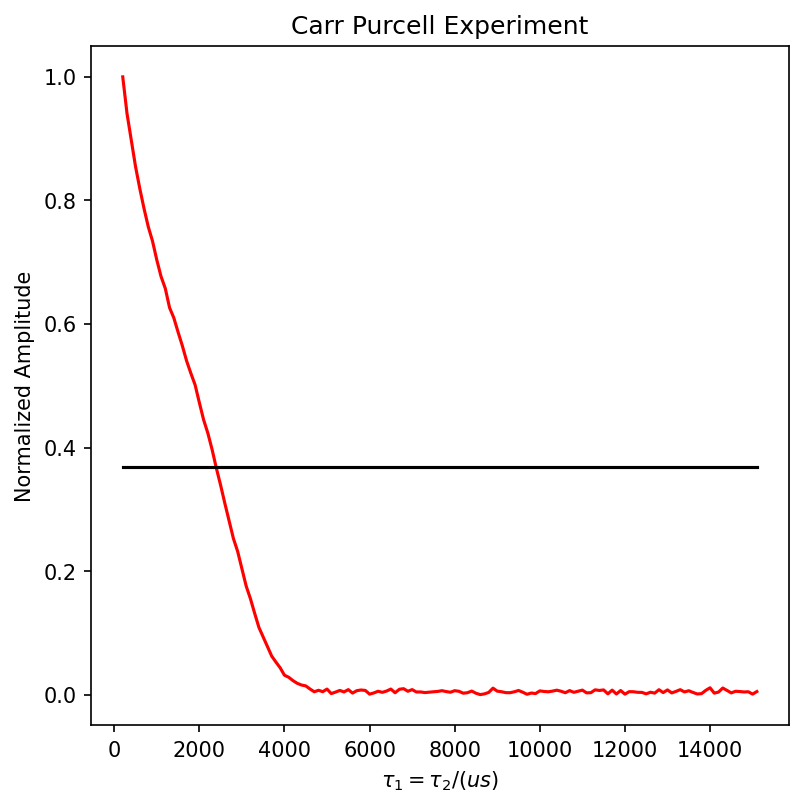

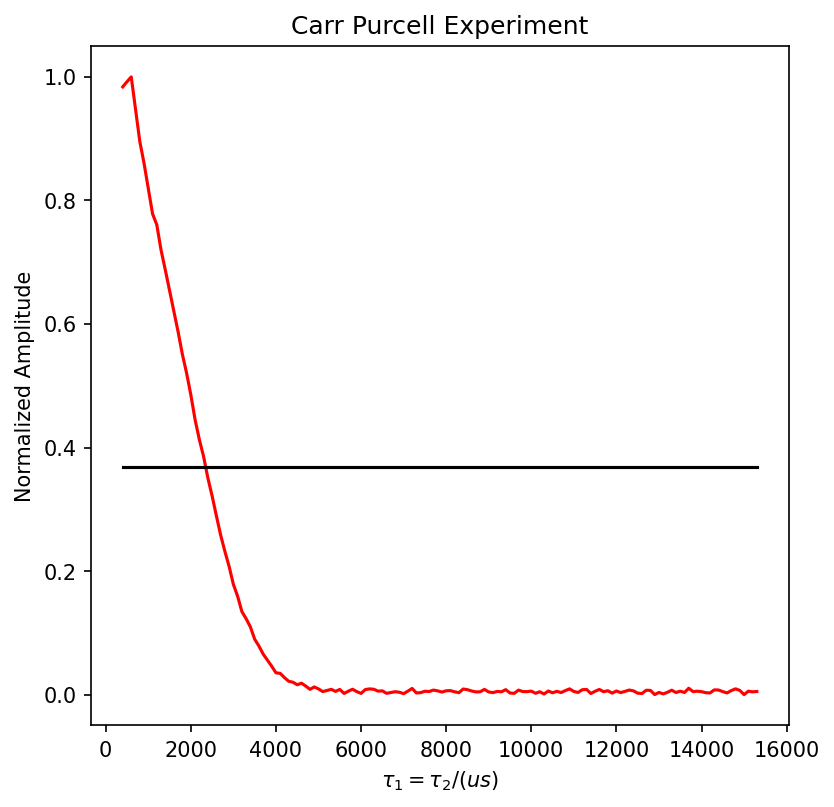

In [4]:
po.main_run(xepr,[16,32],664,"SRSF1_H20_50K","/home/xuser/xeprFiles/Data/HUKA/2022/2022_03_16_SRSF1_H20_5pDEER_test/")

## DEER

In [4]:
# # Rephase for DEER
tune.tune_power(xepr,500,'+<x>',ps_target = 32)
tune.tune_phase_force(xepr,500,'+<x>','R-',ps_length = 32)
tune.tune_power(xepr,500,'-<x>',ps_target = 32)
tune.tune_phase_force(xepr,500,'-<x>','R-',ps_length = 32)
tune.tune_power(xepr,500,'-<y>',ps_target = 16)
tune.tune_phase_force(xepr,500,'-<y>','R+',ps_length = 16)

Attenuator Setting = 50.0 	 inte = -269216.44 
Attenuator Setting = 55.0 	 inte = -186760.97 
Attenuator Setting = 45.0 	 inte = -221888.34 
Attenuator Setting = 47.5 	 inte = -257342.41 
Attenuator Setting = 51.2 	 inte = -262354.75 
Attenuator Setting = 49.5 	 inte = -269411.69 
Attenuator Setting = 49.0 	 inte = -268462.88 
Optimal Attenuator Setting for BrXAmp is: 49.0
Phase Setting = 6.0 	 Phase = 0.31 	 Phase Dif = 0.31
Phase Setting = 3.0 	 Phase = -0.62 	 Phase Dif = 0.62
Phase Setting = 1.0 	 Phase = -0.38 	 Phase Dif = 0.38
Phase Setting = 0.0 	 Phase = -0.24 	 Phase Dif = 0.24
Phase Setting = 2.5 	 Phase = -0.21 	 Phase Dif = 0.21
Phase Setting = 5.0 	 Phase = -0.42 	 Phase Dif = 0.42
Phase Setting = 7.5 	 Phase = -0.83 	 Phase Dif = 0.83
Phase Setting = 10.0 	 Phase = -1.07 	 Phase Dif = 1.07
Phase Setting = 12.5 	 Phase = -1.41 	 Phase Dif = 1.41
Phase Setting = 15.0 	 Phase = -1.61 	 Phase Dif = 1.61
Phase Setting = 17.5 	 Phase = -1.80 	 Phase Dif = 1.80
Phase Setting = 

10.0

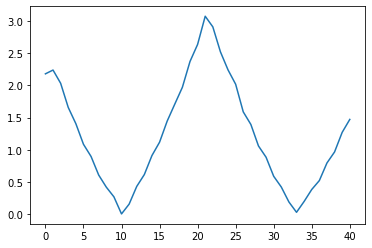

In [5]:
plt.plot(np.real(a))

In [3]:
pulse_lengths = 16
delays = [574,400,2800]
steps = [12,2,2]
avgs = [10,70,1]
api.run_4pDeer(cur_exp,pulse_lengths,delays,steps,avgs)

DEER Dimension changed to 231


1

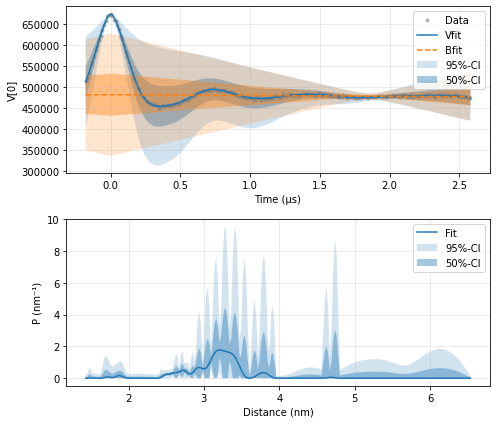

SNR=393.3293713634726
Mod=0.28480413188781206


In [43]:
[fit,sigma] = api.deerlab_next_scan()
fit.plot()
print(f'SNR={fit.V.max()/sigma}')
print(f'Mod={fit.exparam[0]}')

In [13]:
api.set_PulseSpel_var(cur_exp,"n",700)

In [32]:
fit.exparam[0]

0.28806796560316017

In [35]:
sigma

959.1444636518585

In [41]:
  cur_exp.getParam("NbScansToDo").value

700.0

In [13]:
data = xepr.acquire_dataset()
t = data.time
d = data.data
d = tune.DC_cor(d)
re = np.real(d)
im = np.imag(d)

In [14]:
tune.calc_phase(t,d)


-2.9832877474451966

In [5]:
16%3

1